In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58d2344785c89d71f3ed3a096b8a32e0


In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i,city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create end point URL with each city. 
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Add 1 to the record count 
    record_count += 1 
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | dolinsk
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | saint-joseph
Processing Record 6 of Set 1 | charlestown
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | sarangani
Processing Record 11 of Set 1 | placerville
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | njeru
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | edd
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | urumqi
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | wuwei
Processing 

Processing Record 40 of Set 4 | raglan
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | baraya
Processing Record 44 of Set 4 | gibraltar
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | oranjestad
Processing Record 48 of Set 4 | north bend
Processing Record 49 of Set 4 | souillac
Processing Record 50 of Set 4 | nava
Processing Record 1 of Set 5 | san angelo
Processing Record 2 of Set 5 | balad
Processing Record 3 of Set 5 | joniskelis
Processing Record 4 of Set 5 | eskisehir
Processing Record 5 of Set 5 | svetlaya
Processing Record 6 of Set 5 | sakakah
Processing Record 7 of Set 5 | ustye
Processing Record 8 of Set 5 | robertsport
Processing Record 9 of Set 5 | san vicente
Processing Record 10 of Set 5 | hobyo
Processing Record 11 of Set 5 | ksenyevka
City not found. Skipping...
Processing Record 12 of Set 5 | cheuskiny
City not found. Skipping...
Processing

Processing Record 27 of Set 8 | vaitape
Processing Record 28 of Set 8 | tomatlan
Processing Record 29 of Set 8 | vila franca do campo
Processing Record 30 of Set 8 | dakar
Processing Record 31 of Set 8 | tire
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | mikuni
Processing Record 34 of Set 8 | weihe
Processing Record 35 of Set 8 | mantua
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | pucallpa
Processing Record 38 of Set 8 | jhelum
Processing Record 39 of Set 8 | meulaboh
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | vrangel
Processing Record 43 of Set 8 | sassandra
Processing Record 44 of Set 8 | beyneu
Processing Record 45 of Set 8 | bambanglipuro
Processing Record 46 of Set 8 | peniche
Processing Record 47 of Set 8 | masterton
Processing Record 48 of Set 8 | sijunjung
Processing Record 49 of Set 8 | torbay
Processing Record 50 of Set 8 | kamenskoye
City n

Processing Record 16 of Set 12 | can tho
Processing Record 17 of Set 12 | mayo
Processing Record 18 of Set 12 | puerto rico
Processing Record 19 of Set 12 | bulalacao
Processing Record 20 of Set 12 | tabuk
Processing Record 21 of Set 12 | havre-saint-pierre
Processing Record 22 of Set 12 | marcona
City not found. Skipping...
Processing Record 23 of Set 12 | bilovec
Processing Record 24 of Set 12 | pascagoula
Processing Record 25 of Set 12 | bhanvad
Processing Record 26 of Set 12 | whitehorse
Processing Record 27 of Set 12 | port keats
Processing Record 28 of Set 12 | hammerfest
Processing Record 29 of Set 12 | luena
Processing Record 30 of Set 12 | peleduy
Processing Record 31 of Set 12 | yining
Processing Record 32 of Set 12 | dmitriyevka
Processing Record 33 of Set 12 | calatayud
Processing Record 34 of Set 12 | takhtamygda
Processing Record 35 of Set 12 | watsa
Processing Record 36 of Set 12 | buariki
City not found. Skipping...
Processing Record 37 of Set 12 | matamoros
Processing 

In [19]:
len(city_data)

567

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.01,17.94,53.60,81,82,8.05,ZA,2020-08-04 06:13:17
1,Dolinsk,47.35,142.80,59.00,93,75,17.90,RU,2020-08-04 06:13:18
2,Punta Arenas,-53.15,-70.92,39.20,64,55,12.75,CL,2020-08-04 06:13:19
3,Saint-Joseph,-21.37,55.62,71.01,68,40,27.51,RE,2020-08-04 06:13:20
4,Charlestown,-32.95,151.67,73.00,36,16,3.00,AU,2020-08-04 06:10:04
5,Dikson,73.51,80.55,45.16,98,100,18.01,RU,2020-08-04 06:13:21
6,Mahebourg,-20.41,57.70,69.80,64,75,13.87,MU,2020-08-04 06:09:31
7,Yellowknife,62.46,-114.35,69.01,88,75,6.93,CA,2020-08-04 06:13:21
8,Sarangani,5.40,125.46,82.20,77,100,6.76,PH,2020-08-04 06:13:22
9,Placerville,38.73,-120.80,72.00,40,1,5.82,US,2020-08-04 06:13:22


In [22]:
new_city_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_city_order]

In [26]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2020-08-04 06:13:17,-33.01,17.94,53.60,81,82,8.05
1,Dolinsk,RU,2020-08-04 06:13:18,47.35,142.80,59.00,93,75,17.90
2,Punta Arenas,CL,2020-08-04 06:13:19,-53.15,-70.92,39.20,64,55,12.75
3,Saint-Joseph,RE,2020-08-04 06:13:20,-21.37,55.62,71.01,68,40,27.51
4,Charlestown,AU,2020-08-04 06:10:04,-32.95,151.67,73.00,36,16,3.00


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/05/20'

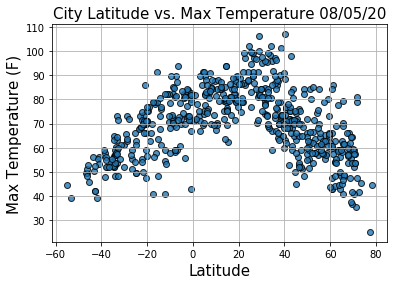

In [53]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"), fontsize=15)
plt.ylabel("Max Temperature (F)", fontsize=15)
plt.yticks(np.arange(30,111, step=10.0))
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

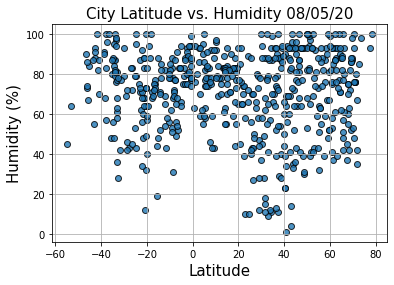

In [60]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"), fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

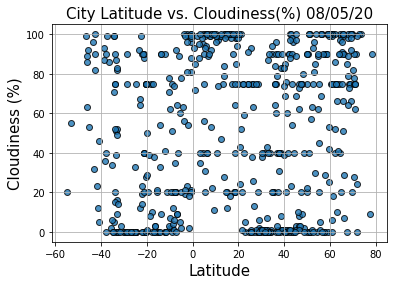

In [61]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Cloudiness(%) " + time.strftime("%x"), fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

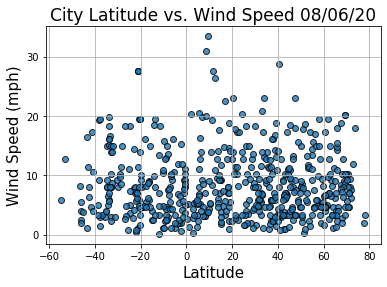

In [76]:
# Build the scatter plot for latitude vs.Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"), fontsize = 17)
plt.ylabel("Wind Speed (mph)" , fontsize=15)
plt.xlabel("Latitude" , fontsize=15)
plt.yticks(np.arange(0,40,step=10.0))
plt.grid(True)

# Save the fugure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()